In [1]:
from mhdd import MessageHDD

In [3]:
# this is a trick I have to do on my computer, totally optional, just import spacy however you can
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')

import spacy

In [4]:
import pandas as pd

model = spacy.load("en_core_web_sm")

# create a lemmatizer to pass to our metric class
def lemmatize(text, lang='en', model=model):
    
    if not model:
        model = spacy.load("en_core_web_sm")
    doc = model(text)
    sent = []

    # remove puctuation and make all numbers the same token
    for word in doc:
        if word.pos_ not in ['NUM', 'PUNCT', 'SYM', 'X']:
            sent.append(word.lemma_.lower())
        elif word.pos_ == 'NUM':
            sent.append('NUMBER')
            
    return sent

In [6]:
# test it on the weezer review dataset
reviews = pd.read_json('weezer_reviews.json')

mhdd = MessageHDD(processor=lemmatize)
mhdd.fit(reviews['text'].tolist())
reviews['mhdd'] = mhdd.process_corpus()

In [8]:
pd.set_option('display.max_colwidth', 0)

In [9]:
# most diverse reviews

reviews.sort_values('mhdd').head(10)

,text,grade,album,target,mhdd
818,"This album is really good. I didn't give it a 10 just because I think it could have been better. By better I mean more on the lines of Pinkerton's sound. I love Pinkerton, all the emmotions in River's lyrics. To me it's the perfect album. But The Green Album doesn't show those emmotions that I love. Don't get me wrong...i really really like the album, This album is really good. I didn't give it a 10 just because I think it could have been better. By better I mean more on the lines of Pinkerton's sound. I love Pinkerton, all the emmotions in River's lyrics. To me it's the perfect album. But The Green Album doesn't show those emmotions that I love. Don't get me wrong...i really really like the album, it's just not another Pinkerton.… Expand",8.0,weezer-2001,1,0.003194
821,"I think it's a great effort. Not one of the best albums in the world (that's why it's not a 10), but you have to admit it's a LOT better than most of the albums being released today. Not as good as the Blue album (which I think gets an 9). Well, it's been in my cd player for the last 48 hours. I mean, you can't expect albums tha deserve 10 all the time, so I think it's a great effort. Not one of the best albums in the world (that's why it's not a 10), but you have to admit it's a LOT better than most of the albums being released today. Not as good as the Blue album (which I think gets an 9). Well, it's been in my cd player for the last 48 hours. I mean, you can't expect albums tha deserve 10 all the time, so don't complain!… Expand",8.0,weezer-2001,1,0.003241
587,"Can't say I love this album, but I do love at least ""Heart Songs"" - it's a great power ballad homage to so many influences. I also like ""Pork and Beans,"" it's not bad, and surprisingly ""Everybody get Dangerous"" isn't bad either. But that's about all you can say, ""not bad"" but also not great. Except for Heart Songs. It saves the album for me. It's a decent Can't say I love this album, but I do love at least ""Heart Songs"" - it's a great power ballad homage to so many influences. I also like ""Pork and Beans,"" it's not bad, and surprisingly ""Everybody get Dangerous"" isn't bad either. But that's about all you can say, ""not bad"" but also not great. Except for Heart Songs. It saves the album for me. It's a decent album and good for the car.… Expand",8.0,weezer-red-album,1,0.003437
541,"This is my least favorite album of all time. This isn't because the music is necessarily bad (but it is pretty lazy). It's not because the lyrics are necessarily bad (but you can't really argue for them with lines like ""I will ape the goomba if you tire""). It's because I have a certain standard for Weezer- my favorite band. They have to be good. It's hard for me to think that masterpiecesThis is my least favorite album of all time. This isn't because the music is necessarily bad (but it is pretty lazy). It's not because the lyrics are necessarily bad (but you can't really argue for them with lines like ""I will ape the goomba if you tire""). It's because I have a certain standard for Weezer- my favorite band. They have to be good. It's hard for me to think that masterpieces like Pinkerton and albums like this can come from the same band. If it wasn't Weezer it might be acceptable, but unfortunately for this album it is a Weezer album and so it mud be compared to Blue and Pinkerton, and that is where it fails.… Expand",0.0,raditude,0,0.003492
444,It is truly and utterly one of the greatest albums of all time. It flows so well. Cuomo's delivery is so powerful. The guitars roar and harmonize so beautifully. Sharp's bass is thundering and Wilson's drums are so fitting. Complex when they need to be and simple when they need to be. This album will probably never be topped and remains one of the most emotional and powerful alt rockIt is truly and utterly one of the greatest albums of all time. It flows so well. Cuomo's delivery is so powerful. The guitars roar and harmonize so bea

In [10]:
# least diverse reviews
reviews.sort_values('mhdd').tail(10)

,text,grade,album,target,mhdd
393,7/10 .................................................................................................................................................,7.0,death-to-false-metal,1,0.985780
484,7/10 .................................................................................................................................................,7.0,hurley,1,0.985780
774,9/10 .................................................................................................................................................,9.0,maladroit,1,0.985780
651,8/10 .................................................................................................................................................,8.0,make-believe,1,0.985780
816,9/10 .................................................................................................................................................,9.0,weezer-2001,1,0.985780
635,8/10 .................................................................................................................................................,8.0,weezer-red-album,1,0.985780
540,7/10 .................................................................................................................................................,7.0,raditude,1,0.985780
808,good,10.0,weezer-2001,1,0.992373
799,Awesome!!!!,10.0,weezer-2001,1,0.999639
716,Excellent!,10.0,make-believe,1,0.999759


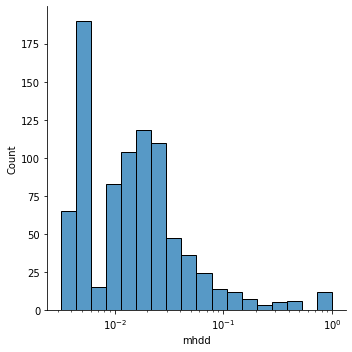

In [13]:
# distribution of the metric
import seaborn as sns
sns.displot(reviews['mhdd'], log_scale=True)